In [224]:
using Plots
gr()
using FFTW

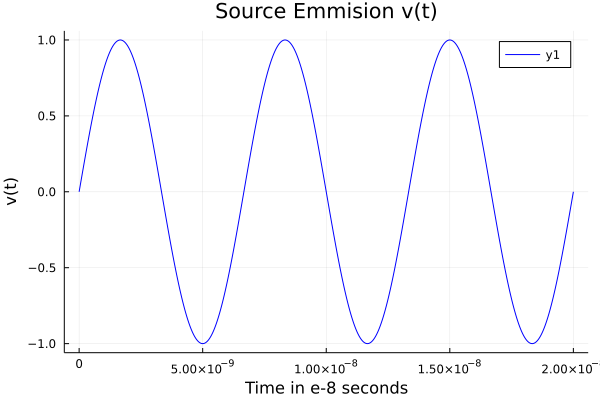

In [225]:
# Signal Emmiter

f0 = 150e6  # 150 MHz
fs = 350e8 # Sampling 300MHz

Δt = 1/fs
t = 0:Δt:3/f0

ω0 = 2*pi*f0;   # rad/s   
A = 1

v = A*sin.(ω0*t);   


plot(t, v ,  color= :blue, title="Source Emmision v(t)", ylabel="v(t)", xlabel="Time in e-8 seconds")

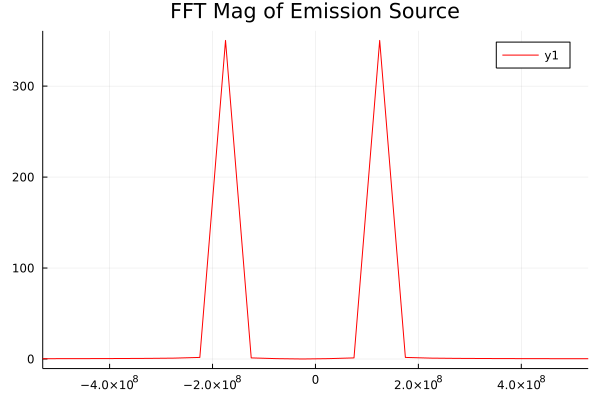

In [226]:
V = fft(v)
magV = fftshift(abs.(V))

N = length(t)
Δf = fs/N
f = -fs/2:Δf:(fs/2-Δf) 

#ylabel("Magnitude")
fftplot = plot(f,magV,color= :red, title="FFT Mag of Emission Source", xlims=[-0.5e9,0.5e9])
display(fftplot)

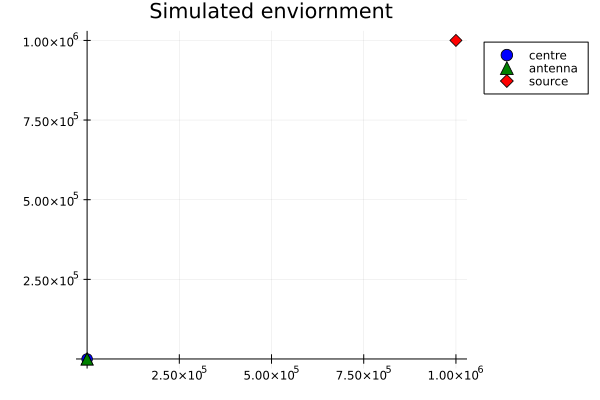

In [227]:
# Center
x = [0]
y = [0]
scatter(x,y, framestyle = :origin, title = "Simulated enviornment", color= :blue, marker= :dot, markersize = 6, label="centre", legend = :outertopright)

# Antenna
x = [-0.5,0.5]
y = [0,0]
scatter!(x,y, color= :green, marker= :utriangle, markersize = 6, label="antenna")

# Source
x = [1000000]
y = [1000000]
scatter!(x,y, color= :red, marker= :d, markersize = 6, label="source")

In [228]:
# Calculating distance delay to get phase shift

# Antenna
ax = [-0.1,0.1]
ay = [0,0]

# Source
sx = [0.2]
sy = [1]

# Origin
d0 = sqrt((sx[1]-0)^2+(sy[1]-0)^2)

# Antenna 1
d1 = sqrt((sx[1]-ax[1])^2+(sy[1]-ay[1])^2)

# Antenna 2
d2 = sqrt((sx[1]-ax[2])^2+(sy[1]-ay[2])^2)


println("Distance")
println("D0 = ",d0)
println("D1 = ",d1)
println("D2 = ",d2)

Distance
D0 = 1.019803902718557
D1 = 1.044030650891055
D2 = 1.004987562112089


In [229]:
# Calculating time delay
c = 3e8
t1 = d1/c
t2 = d2/c

println("time delay")
println("t1 = ", t1)
println("t2 = ", t2)

time delay
t1 = 3.4801021696368503e-9
t2 = 3.34995854037363e-9


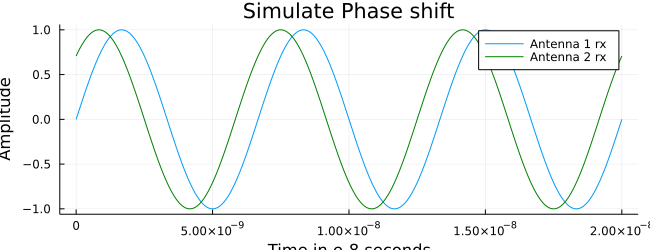

In [230]:
# Singals recived with Phase shift

v1 = A*sin.(ω0*t);
v2 = A*sin.(ω0*t.+pi/4);


#plot(t,v, label="Source")
plot(t,v1, label="Antenna 1 rx", title="Simulate Phase shift", ylabel="Amplitude", xlabel="Time in e-8 seconds")
plot!(t,v2, label="Antenna 2 rx",  color= :green)
plot!(size=(650,250))


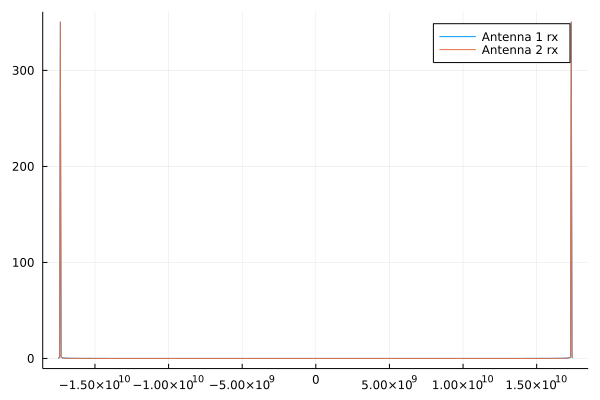

In [231]:
#Shown Phase Shift
#plot(f,magV,color= :red, title="FFT Mag of Emission Source", label="Source")

V1 = fft(v1)
magV1 = fftshift(abs.(V1))
plot(f,abs.(V1), label="Antenna 1 rx")

V2 = fft(v2)
magV2 = fftshift(abs.(V2))
plot!(f,abs.(V2), label="Antenna 2 rx")


In [232]:
# Get Phase from recieved signal

maxsignal_1 = findmax(abs.(V1))
maxsignal_2 = findmax(abs.(V2))

println(maxsignal_1)
println(maxsignal_2)
maxsignal_1 = maxsignal_1[2]
maxsignal_2 = maxsignal_2[2]

p1 = V1[maxsignal_1]
p2 = V2[maxsignal_2]

#### Using angle
phase1 = angle(p1)
phase2 = angle(p2)
println(phase1)
println(phase2)
pd = phase2 - phase1
println("PD = ", pd)


### Using conjugate
Z = p1 * conj(p2)
phase_diff = angle(Z) # in rads
println("Phase diff =", phase_diff)

(350.2392093563114, 699)
(350.4894997393639, 699)
1.557351565081959
0.7712395397857187
PD = -0.7861120252962402
Phase diff =0.7861120252962404


In [233]:
# Cal angle from phase diff

y = 1.998616 # Wave length and 89MHz
d = 2 # 119cm 1.19m spacing of antenna



println(phase_diff) # in rads
x = (y * phase_diff) / (2 * pi * d)
println(x)

AoA_rad = asin(x)
println("Angle of arrival in rad: ", AoA_rad)
AoA_deg = AoA_rad * 180/pi 

print("AoA in deg: ", AoA_deg, "\n")

0.7861120252962404
0.12502703602854
Angle of arrival in rad: 0.12535508097025683
AoA in deg: 7.182317080116417


In [234]:
## From PD

println(pd) # in rads
x = (y * pd) / (2 * pi * d)
println(x)

AoA_rad = asin(x)
println("Angle of arrival in rad: ", AoA_rad)
AoA_deg = AoA_rad * 180/pi 

print("AoA in deg: ", AoA_deg, "\n")

-0.7861120252962402
-0.12502703602853998
Angle of arrival in rad: -0.1253550809702568
AoA in deg: -7.182317080116415


In [235]:
#Defined Angle from gemoetry
i = abs.(sx[1])/d0
actual = acos(i)
actual_deg = 90 - (actual * 180/pi )
println("Defined angle: ", actual_deg)
println("###########")

Defined angle: 11.309932474020215
###########


In [236]:
function loop(i)
    # Center
    x = [0]
    y = [0]
    # Antenna
    ax = [-0.5,0.5]
    ay = [0,0]
    # Source
    sx = [i]
    sy = [10]

    # Origin
    d0 = sqrt((sx[1]-0)^2+(sy[1]-0)^2)
    # Antenna 1
    d1 = sqrt((sx[1]-ax[1])^2+(sy[1]-ay[1])^2)
    # Antenna 2
    d2 = sqrt((sx[1]-ax[2])^2+(sy[1]-ay[2])^2)

    c = 3e8
    t1 = d1/c
    t2 = d2/c
    
    f0 = 150e6  # 150 MHz
    fs = 350e8 # Sampling 300MHz
    Δt = 1/fs
    t = 0:Δt:3/f0
    ω0 = 2*pi*f0;   # rad/s   
    A = 1

    v1 = A*sin.(ω0*t.-pi/4);
    v2 = A*sin.(ω0*t.-t2);

    V1 = fft(v1)
    V2 = fft(v2)

    maxsignal_1 = findmax(abs.(V1))
    maxsignal_2 = findmax(abs.(V2))

    maxsignal_1 = maxsignal_1[2]
    maxsignal_2 = maxsignal_2[2]

    p1 = V1[maxsignal_1]
    p2 = V2[maxsignal_2]

    println("Phase1: ", imag(p1))
    println("Phase2: ", imag(p2))
    ### Using conjugate
    Z = p1 * conj(p2)
    phase_diff = angle(Z) # in rads

    y = 1.998616 # Wave length and 89MHz
    d = 1 # 119cm 1.19m spacing of antenna


    println("Phase difference: ", phase_diff) # in rads
    x = (y * phase_diff) / (2 * pi * d)

    AoA_rad = asin(x)
    println("Angle of arrival in rad: ", AoA_rad)
    AoA_deg = AoA_rad * 180/pi 

    print("AoA in deg: ", AoA_deg, "\n")

    i = abs.(sx[1])/d0
    actual = acos(i)
    actual_deg = 90 - (actual * 180/pi )
    println("Defined angle: ", actual_deg)
    println("###########")
end

loop (generic function with 1 method)

In [237]:
function l(i)
    f0 = 150e6  # 150 MHz
    fs = 350e8 # Sampling 300MHz
    Δt = 1/fs
    t = 0:Δt:3/f0
    ω0 = 2*pi*f0;   # rad/s   
    A = 1

    v1 = A*sin.(ω0*t.-i);
    v2 = A*sin.(ω0*t);

    V1 = fft(v1)
    V2 = fft(v2)

    maxsignal_1 = findmax(abs.(V1))
    maxsignal_2 = findmax(abs.(V2))

    maxsignal_1 = maxsignal_1[2]
    maxsignal_2 = maxsignal_2[2]

    p1 = V1[maxsignal_1]
    p2 = V2[maxsignal_2]

    println("Phase1: ", imag(p1))
    println("Phase2: ", imag(p2))
    ### Using conjugate
    Z = p1 * conj(p2)
    phase_diff = angle(Z) # in rads

    y = 1.998616 # Wave length and 89MHz
    d = 1 # 119cm 1.19m spacing of antenna


    println("Phase difference: ", phase_diff) # in rads
    x = (y * phase_diff) / (2 * pi * d)

    AoA_rad = asin(x)
    println("Angle of arrival in rad: ", AoA_rad)
    AoA_deg = AoA_rad * 180/pi 

    println("AoA in deg: ", AoA_deg, "\n")
    println("Phase shift rads = ", i)
    println("Phase shift in degs = ", (i * 180/pi))
end

l (generic function with 1 method)

In [238]:
i = 0
while i <= (pi/2)
    l(i)
    global i += 0.0872665
end

Phase1: 350.2075549301405
Phase2: 350.2075549301405
Phase difference: 0.0
Angle of arrival in rad: 0.0
AoA in deg: 0.0

Phase shift rads = 0
Phase shift in degs = 0.0
Phase1: -349.28588864102403
Phase2: 350.2075549301405
Phase difference: 3.0810916289169277
Angle of arrival in rad: 1.370779588458097
AoA in deg: 78.53988506132886

Phase shift rads = 0.0872665
Phase shift in degs = 5.000002142878398
Phase1: 345.70594355766366
Phase2: 350.2075549301405
Phase difference: 0.1747773191778612
Angle of arrival in rad: 0.055623528847028474
AoA in deg: 3.1869934445589174

Phase shift rads = 0.174533
Phase shift in degs = 10.000004285756797
Phase1: -339.4949652471128
Phase2: 350.2075549301405
Phase difference: 2.9063255250827043
Angle of arrival in rad: 1.179648262045557
AoA in deg: 67.588866725153

Phase shift rads = 0.26179949999999996
Phase shift in degs = 15.000006428635194
Phase1: -330.70022304509695
Phase2: 350.2075549301405
Phase difference: 2.818957064156955
Angle of arrival in rad: 1.112

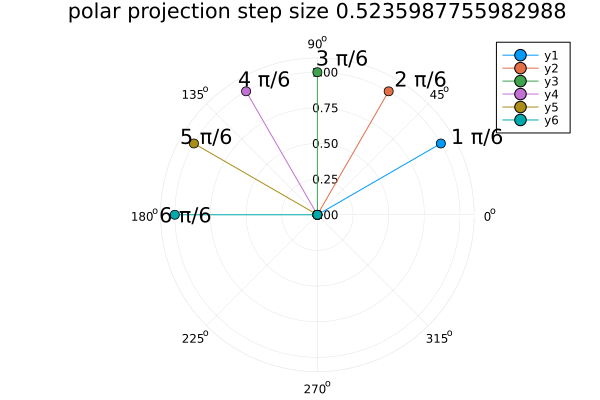

In [239]:
# set step size θ
θ = π/6

# plot points at angle θ at step size π/6 from 0 to 2π, points on the circle NOT to be beconnected, a way to do that is
# plot one root at a time as a segment with first end point at orign [0,0], and second end point at [i*π/6,1].

b1=Float64[1:2;].-1.0

# Q(3): how to plot "π/6" instead of the value of θ in plot title and in annotations?
plt = plot(proj=:polar, m=0, title="polar projection step size $θ")
for i in 1:Int64(π/θ)
    # with marker point size m=5
    plot!(plt, 0:i*θ:i*θ, b1, m=5, annotations=(b1[2]*cos(i*θ), b1[2]*sin(i*θ), text("$i π/6", :left)))
end

# return the plot object, won't display without this
plt




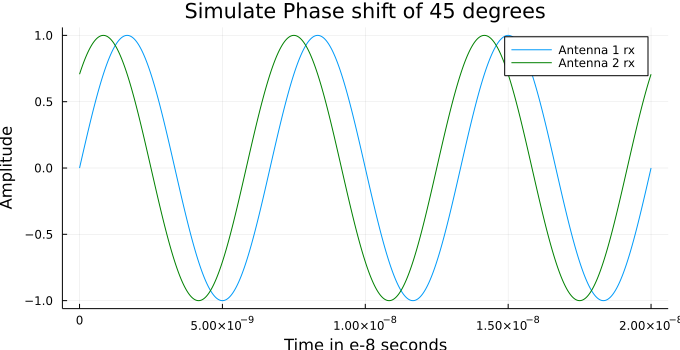

In [240]:
v1 = A*sin.(ω0*t);
v2 = A*sin.(ω0*t.+pi/4);


#plot(t,v, label="Source")
plot(t,v1, label="Antenna 1 rx", title="Simulate Phase shift of 45 degrees", ylabel="Amplitude", xlabel="Time in e-8 seconds")
plot!(t,v2, label="Antenna 2 rx",  color= :green)
plot!(size=(680,350))